# Задание 1

https://www.kaggle.com/unsdsn/world-happiness - данные об уровне счастья людей за 2019 год

Требования к анализу:

* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('2019.csv')
df.head

<bound method NDFrame.head of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


# 1 Точечная диаграмма

Связь уровня счастья и ВВП 

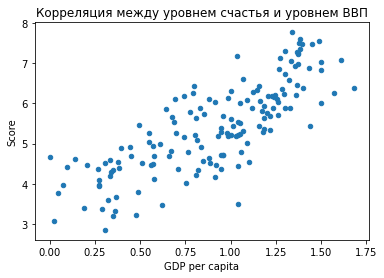

In [33]:
df.plot(kind='scatter', 
        x='GDP per capita', 
        y='Score', 
        title='Корреляция между уровнем счастья и уровнем ВВП')
plt.show()

Можно предположить, что чем выше уровень ВВП, тем выше уровень счастья

# 2 Столбчатая диаграмма

Разрыв между верхним и нижним уровнем счастья в странах

In [30]:
df_score = df[['Country or region','Score']].sort_values('Score')
df_min_max_score = df_score.head()
df_min_max_score

,Country or region,Score
155,South Sudan,2.853
154,Central African Republic,3.083
153,Afghanistan,3.203
152,Tanzania,3.231
151,Rwanda,3.334


In [31]:
df_min_max_score = df_min_max_score.append(df_score.tail()) # делаем список топ 5 стран с самым высоким и самым низким уровнем
df_min_max_score.head(20)

,Country or region,Score
155,South Sudan,2.853
154,Central African Republic,3.083
153,Afghanistan,3.203
152,Tanzania,3.231
151,Rwanda,3.334
4,Netherlands,7.488
3,Iceland,7.494
2,Norway,7.554
1,Denmark,7.600
0,Finland,7.769


<AxesSubplot:title={'center':'Уровень счастья по странам'}, xlabel='[South Sudan, Central African Republic, Afghanistan, Tanzania, Rwanda, Netherlands, Iceland, Norway, Denmark, Finland]', ylabel='Score'>

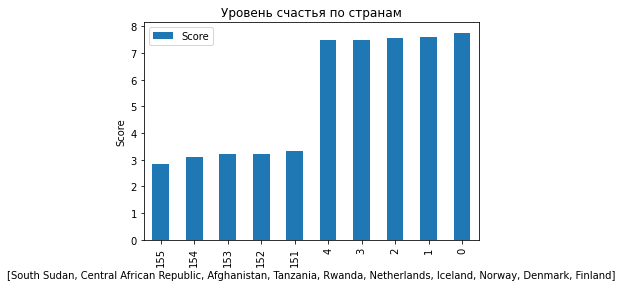

In [34]:
df_min_max_score.plot(kind='bar', title='Уровень счастья по странам',
                    xlabel=df_min_max_score['Country or region'],
                    ylabel='Score')

Можно увидеть, что разрыв между странами с самым высоким уровнем счастья и самым низким практически в 2 раза. При этом страны со схожим уровнем расположены в одном географическом регионе. Дальше можно предположить, что расположение так же влияет на уровень счастья и исследовать особенности расположения стран. 

# 3 Столбчатая диаграмма с накоплением

Сравнение данных по всем показателем между странами с верхним и нижним уровнем счастья

In [45]:
df.sort_values('Score')
df_min_max = df.head()
df_min_max

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [46]:
df_min_max = df_min_max.append(df.tail()) # делаем полный список топ 5 стран с самым высоким и самым низким уровнем
df_min_max.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


<AxesSubplot:title={'center':'Уровень показателей по странам'}, xlabel='[Finland, Denmark, Norway, Iceland, Netherlands, Rwanda, Tanzania, Afghanistan, Central African Republic, South Sudan]', ylabel='Score'>

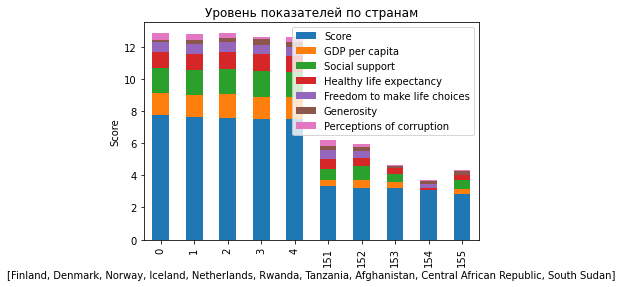

In [49]:
df_min_max.drop('Overall rank', axis=1).plot(kind='bar', 
                                             title='Уровень показателей по странам',
                                             xlabel=df_min_max['Country or region'],
                                             ylabel='Score',
                                             stacked=True)

Можно предположить, что уровень счастья может быть связан с показателями ВВП страны и уровнем социальной поддержки. 

# 4 Гистограмма

Распределение уровней счастья

<AxesSubplot:title={'center':'Распределение уровней счастья'}, ylabel='Frequency'>

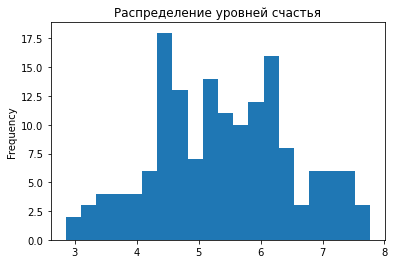

In [40]:
df['Score'].plot(kind='hist',
                   title='Распределение уровней счастья', bins=20)

<AxesSubplot:title={'center':'Распределение уровней счастья'}, ylabel='Frequency'>

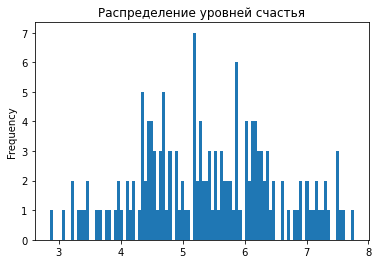

In [44]:
#Это не нормальное распределение. Увеличим количество интервалов.
df['Score'].plot(kind='hist',
                   title='Распределение уровней счастья', bins=100)

Некоторых показателей уровня не существует - вероятно, это связано с методикой рассчета этого показателя. Далее можно исследовать страны с наиболее часто встречаюшимся уровнем и особенности этих стран. 